In [1]:
from sklearn import linear_model
from sklearn import datasets
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [8]:
# 데이터 가져옴
data = datasets.load_boston()

In [9]:
# key 확인
data.keys()

dict_keys(['target', 'data', 'feature_names', 'filename', 'DESCR'])

In [11]:
# field 확인
print(data.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [10]:
# description 확인
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [51]:
# make dataframe 
df = pd.DataFrame(data = data.data, columns = data.feature_names)
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [52]:
# normalize dataframe 
normalization_df = (df - df.mean())/df.std()
normalization_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419367,0.284548,-1.286636,-0.272329,-0.144075,0.413263,-0.119895,0.140075,-0.981871,-0.665949,-1.457558,0.440616,-1.074499
1,-0.416927,-0.487240,-0.592794,-0.272329,-0.739530,0.194082,0.366803,0.556609,-0.867024,-0.986353,-0.302794,0.440616,-0.491953
2,-0.416929,-0.487240,-0.592794,-0.272329,-0.739530,1.281446,-0.265549,0.556609,-0.867024,-0.986353,-0.302794,0.396035,-1.207532
3,-0.416338,-0.487240,-1.305586,-0.272329,-0.834458,1.015298,-0.809088,1.076671,-0.752178,-1.105022,0.112920,0.415751,-1.360171
4,-0.412074,-0.487240,-1.305586,-0.272329,-0.834458,1.227362,-0.510674,1.076671,-0.752178,-1.105022,0.112920,0.440616,-1.025487


In [53]:
# convert array (insert X)
np.array(normalization_df)

array([[-0.41936693,  0.28454827, -1.28663623, ..., -1.45755797,
         0.44061589, -1.07449897],
       [-0.41692667, -0.48724019, -0.59279438, ..., -0.3027945 ,
         0.44061589, -0.49195252],
       [-0.416929  , -0.48724019, -0.59279438, ..., -0.3027945 ,
         0.39603507, -1.20753241],
       ...,
       [-0.41303783, -0.48724019,  0.11562398, ...,  1.17530274,
         0.44061589, -0.98207574],
       [-0.40736095, -0.48724019,  0.11562398, ...,  1.17530274,
         0.40282626, -0.86444617],
       [-0.41458988, -0.48724019,  0.11562398, ...,  1.17530274,
         0.44061589, -0.66839688]])

In [54]:
# not have NA
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


In [18]:
data.target[:10]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

In [55]:
# make linear model
model = linear_model.LinearRegression()

In [56]:
# 13개 column을 feature로 했을 때
X_train = np.array(normalization_df)
y_train = data.target

In [57]:
model.fit(X_train, y_train)
# 기울기 출력
print(model.coef_)

[-0.92906457  1.08263896  0.14103943  0.68241438 -2.05875361  2.67687661
  0.01948534 -3.10711605  2.6648522  -2.07883689 -2.06264585  0.85010886
 -3.74733185]


In [58]:
print('used features: {}'.format(np.sum(model.coef_ != 0)))

used features: 13


In [59]:
print(model.score(X_train, y_train)) # 0~1

0.7406426641094094


In [73]:
print(np.shape(X_train))
print(np.shape(y_train))

(506, 13)
(506,)


In [41]:
# correlation 확인을 위한 dataframe 임시 생성
corr_df = df
corr_df['target'] = data.target
corr_df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


[]

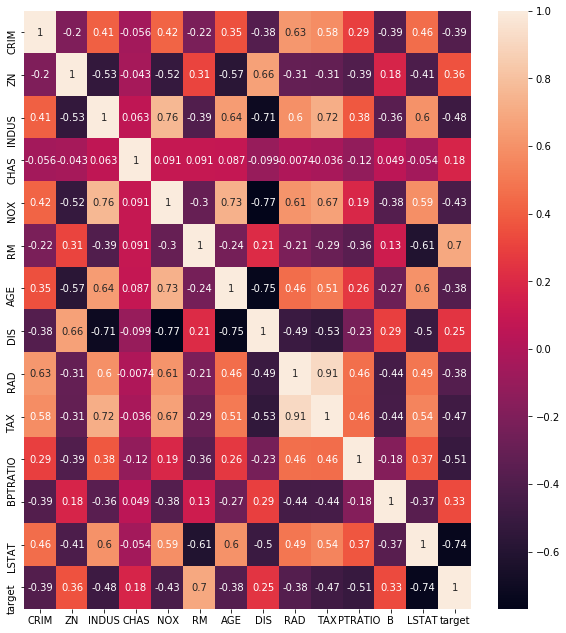

In [42]:
# correlation 확인
plt.figure(figsize=(10,11))
sns.heatmap(corr_df.corr(),annot=True)
plt.plot()

In [75]:
# 관련성이 적은 필드는 제외. 
# chas
df_edit = df.drop(columns = ['CHAS','CRIM','DIS','TAX','ZN'])
df_edit_array = np.array(df_edit)

# make linear model
model_new = linear_model.LinearRegression()

X_train_new = df_edit_array
y_train_new = data.target

model_new.fit(X_train_new, y_train_new)
# 기울기 출력
print(model.coef_)

[-0.92906457  1.08263896  0.14103943  0.68241438 -2.05875361  2.67687661
  0.01948534 -3.10711605  2.6648522  -2.07883689 -2.06264585  0.85010886
 -3.74733185]


In [69]:
print('used features: {}'.format(np.sum(model_new.coef_ != 0)))

used features: 8


In [76]:
# ??
print(model_new.score(X_train_new, y_train_new)) # 0~1

print(np.shape(X_train_new))
print(np.shape(y_train_new))

0.7191792850660185
(506, 9)
(506,)


In [ ]:
# ..